In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def build_lagrangian_basis(q, e):
    n_q_points = q.shape[0]
    n_e_points = e.shape[0]
    
    basis = np.ones((n_e_points, n_q_points), dtype=np.float64)
    
    #for i in range(n_e_points):
    #    for j in range(n_q_points):
    #        for k in range(n_q_points):
    #            if k == j:
    #                continue
    #            basis[i, j] *= (e[i] - q[k]) / (q[j] - q[k])
    
    #for i in range(n_e_points):
    #    for j in range(n_q_points):
    #        basis[]
    
    num = e.reshape((n_e_points, 1)) - q
    den = q.reshape((n_q_points, 1)) - q - np.identity(n_q_points)
    ratio = num.reshape((n_e_points, 1, n_q_points)) / den.reshape((1, n_q_points, n_q_points))
    ratio[:,np.arange(n_q_points),np.arange(n_q_points)] = 1
    basis = np.prod(ratio, axis=2)
    
    
  
    return basis

In [63]:
e = np.linspace(0, 1, 100)
q = np.linspace(0, 1,   4)

In [64]:
def interpolate(f, q, e):
    n_q_points = q.shape[0]
    n_e_points = e.shape[0]
    
    basis = build_lagrangian_basis(q, e)
    
    f_e = np.zeros((n_e_points, ), dtype=np.float64)
    
    for i in range(n_e_points):
        for j in range(n_q_points):
            f_e[i] += basis[i, j] * f(q[j])
            
    return f_e

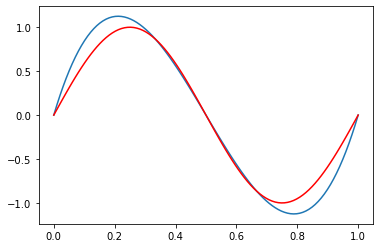

In [66]:
f = lambda x: np.sin(2 * np.pi * x)
f_interp = interpolate(f, q, e)
_ = plt.plot(e, f_interp)
_ = plt.plot(e, f(e), color="red")

In [67]:
def build_lagrangian_basis_2d(q_x, q_y, e_x, e_y):
    n_q_x_points = q_x.shape[0]
    n_q_y_points = q_y.shape[0]
    n_e_x_points = e_x.shape[0]
    n_e_y_points = e_y.shape[0]
    
    basis_shape = (n_e_x_points, n_e_y_points, n_q_x_points, n_q_y_points)
    basis = np.zeros(basis_shape, dtype=np.float64)
    
    bx = build_lagrangian_basis(q_x, e_x)
    by = build_lagrangian_basis(q_y, e_y)
    
    #for i in range(n_e_x_points):
    #    for j in range(n_e_y_points):
    #        for k in range(n_q_x_points):
    #            for l in range(n_q_y_points):
    #                basis[i, j, k, l] = bx[i, k] * by[j, l]
    
    #bx_r = bx.reshape((n_e_x_points, 1, n_q_x_points, 1))
    #by_r = by.reshape((1, n_e_y_points, 1, n_q_y_points))
    
    #basis = bx_r * by_r
    
    basis = np.tensordot(bx, by, axes=0).transpose((0,2,1,3))
    
    return basis

In [68]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 11)
e_x = np.linspace(0, 1, 25)
e_y = np.linspace(0, 1, 27)

In [69]:
def interpolate_2d(f, q_x, q_y, e_x, e_y):
    n_q_x_points = q_x.shape[0]
    n_q_y_points = q_y.shape[0]
    n_e_x_points = e_x.shape[0]
    n_e_y_points = e_y.shape[0]
    
    f_e = np.zeros((n_e_x_points, n_e_y_points), dtype=np.float64)
    X, Y = np.meshgrid(q_x, q_y)
    f_q = f(X.T, Y.T)
    
    basis = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)
      
    #for i in range(n_e_x_points):
    #    for j in range(n_e_y_points):
    #        for k in range(n_q_x_points):
    #            for l in range(n_q_y_points):
    #                f_e[i, j] += basis[i, j, k, l] * f_q[k, l]
    
    f_e = np.tensordot(basis, f_q, axes=([2,3],[0,1]))
    
    return f_e

In [70]:
f_2d = lambda x, y : np.sin(2 * np.pi * x) + y ** 2

In [71]:
f_2d_interp = interpolate_2d(f_2d, q_x, q_y, e_x, e_y)
# Check the errors on a grid
X, Y = np.meshgrid(e_x, e_y)
i, j = np.meshgrid(range(e_x.shape[0]), range(e_y.shape[0]))
np.max(np.abs(f_2d(X,Y) - f_2d_interp[i,j]))

6.787240547723172e-05